In [178]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator, FuncFormatter

Read the data from the [TidyTuesday repo](https://github.com/rfordatascience/tidytuesday/tree/master/data/2023/2023-09-05) and store it in a dataframe:

In [179]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-09-05/demographics.csv", delimiter=",")
df.head()

,year,sample_size,employment,members,covered,p_members,p_covered,facet
0,1973,49095,75519.29120,18088.56993,NaN,0.239523,NaN,all wage and salary workers
1,1974,48245,77101.09793,18176.47503,NaN,0.235749,NaN,all wage and salary workers
2,1975,46488,75703.92288,16778.27992,NaN,0.221630,NaN,all wage and salary workers
3,1976,47648,78776.94195,17402.98490,NaN,0.220915,NaN,all wage and salary workers
4,1977,57191,81334.12743,19335.10077,21534.59938,0.237724,0.264767,all wage and salary workers


We only need the uncategorized data for this analysis:

In [180]:
filtered_data = df.query('facet == "all wage and salary workers"')

Define a dictionary containing the colors:

In [181]:
colors = {
    "green_line": "#617A71",
    "green_fill": "#80A5A0",
    "blue_line": "#37344D",
    "blue_fill": "#9592A6",
    "red_line": "#B3373F",
    "red_fill": "#F28582",
    "background": "#feefe4",
    "labels": "#302e2e"
}

We define some default styles like colors and label sizes:

In [182]:
plt.rcParams["xtick.color"] = colors["labels"]
plt.rcParams["ytick.color"] = colors["labels"]
plt.rcParams["figure.facecolor"] = colors["background"]
plt.rcParams["axes.facecolor"] = colors["background"]
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["ytick.left"] = False
plt.rcParams["xtick.bottom"] = False
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["xtick.labelsize"] = 8

Define a helper function to create titles that are left aligned to the subplot:

In [183]:
def set_leftaligned_title(ax, text, **kwargs):
    bbox = ax.get_yticklabels()[-1].get_window_extent()
    x,_ = ax.transAxes.inverted().transform([bbox.x0, bbox.y0])
    ax.set_title(text, ha="left", x=x, **kwargs)

Define a helper function to support custom thousand separators for tick labels:

In [184]:
def set_thousands_separator_formatter(ax, thousands_separator):
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ",").replace(",", thousands_separator)))

Define a helper function to plot line diagrams that are filled with a color:

In [187]:
def plot_filled(ax, x, y, line_color, fill_color, fill_alpha=1):
    ax.plot(x, y, color=line_color, linewidth=1)
    ax.fill_between(x, y, color=fill_color, alpha=fill_alpha)

Plot the chart:

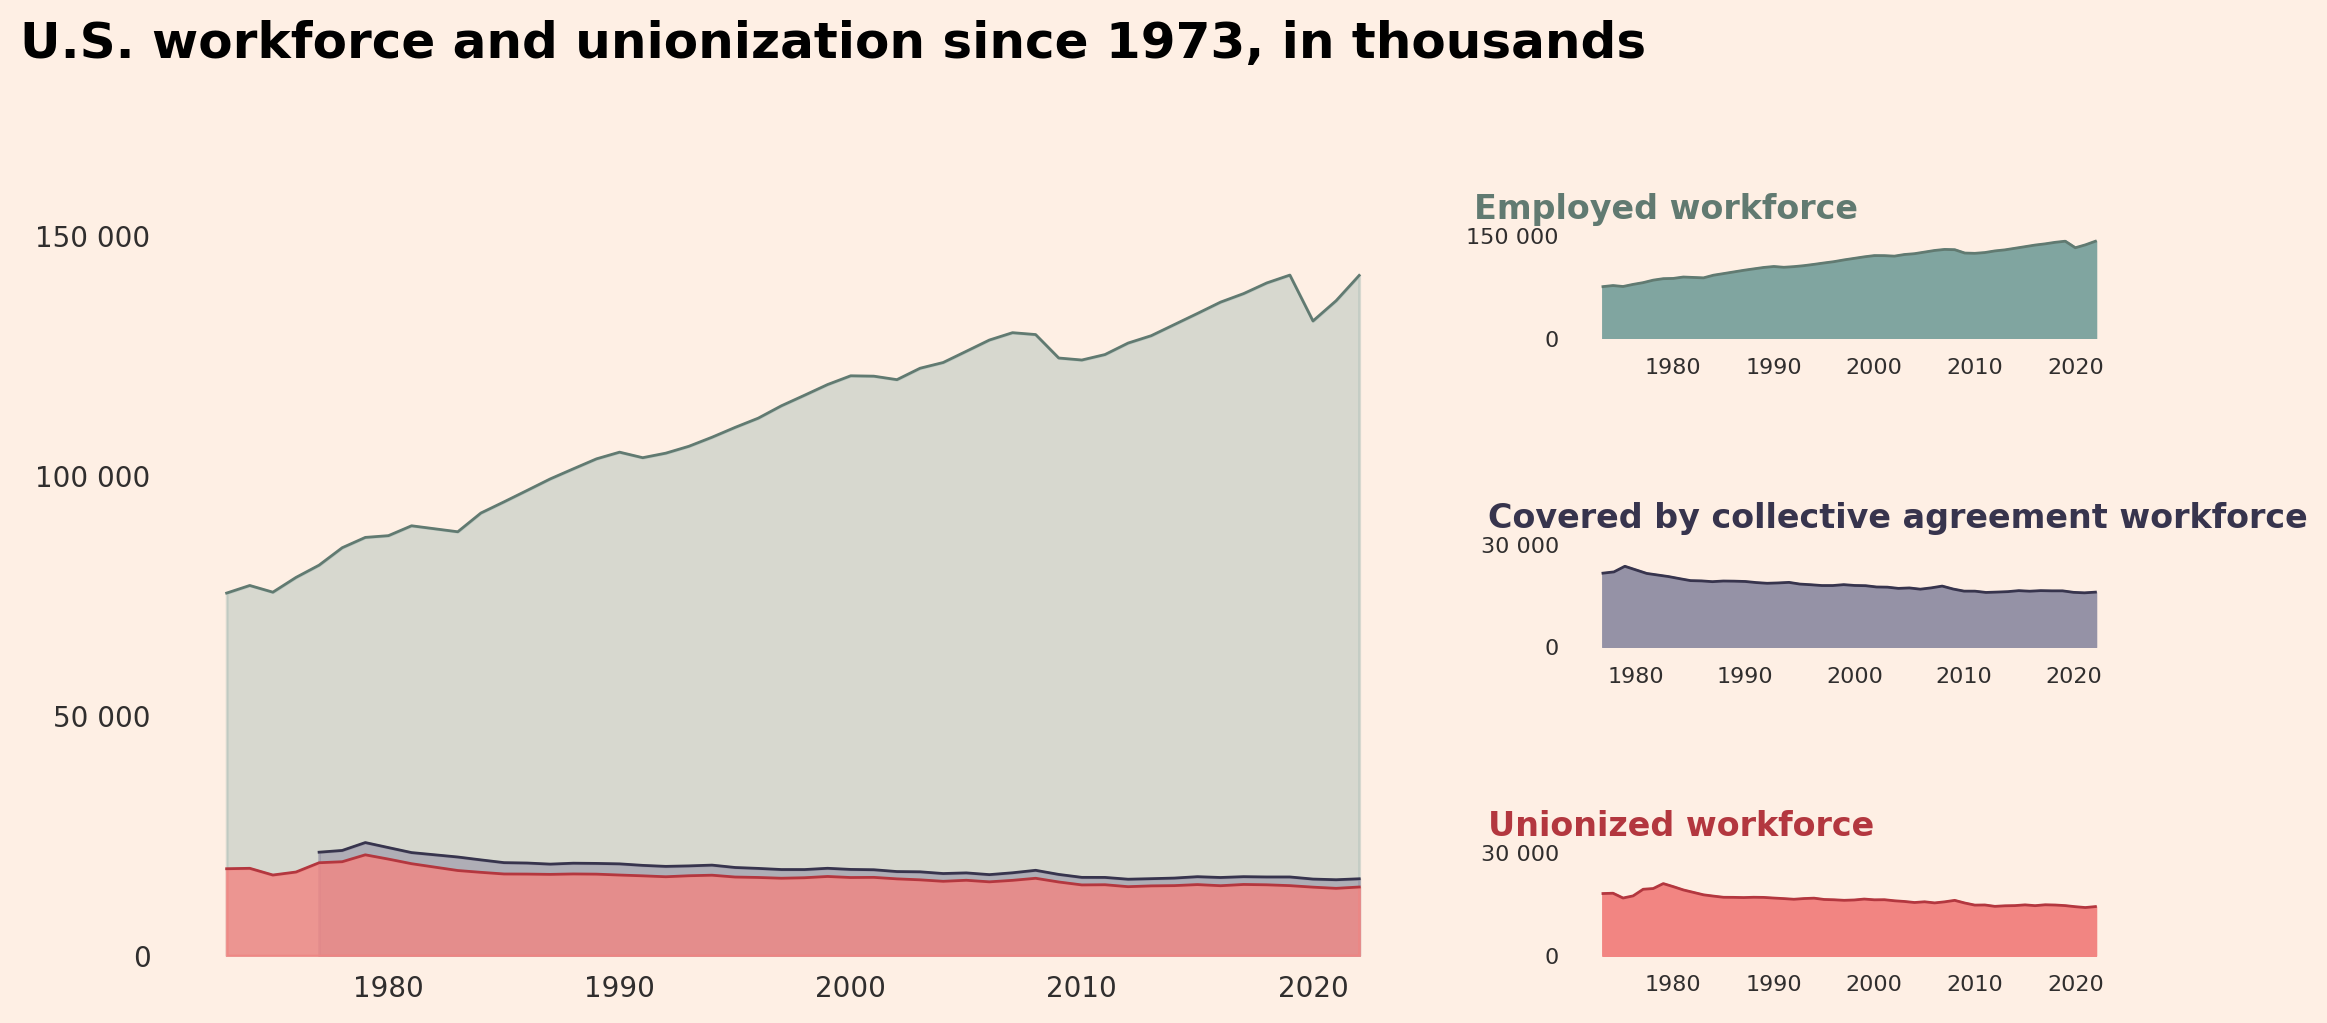

In [191]:
fig, ax = plt.subplot_mosaic(
    """
    AAB
    AAC
    AAD
    """,
    figsize=(15,6),
    dpi=200,
    gridspec_kw={"left": .15, "right": .8, "top": .8, "bottom": .2, "hspace": 2, "wspace": 0.3}
)

fig.suptitle("U.S. workforce and unionization since 1973, in thousands", fontsize=18, fontweight="bold", ha="left", x=0.1)

plot_filled(ax["A"], filtered_data["year"], filtered_data["employment"], colors["green_line"], colors["green_fill"], 0.3)
plot_filled(ax["A"], filtered_data["year"], filtered_data["covered"], colors["blue_line"], colors["blue_fill"], 0.6)
plot_filled(ax["A"], filtered_data["year"], filtered_data["members"], colors["red_line"], colors["red_fill"], 0.8)
ax["A"].set_ylim(ymin=0, ymax=150000)
ax["A"].xaxis.set_major_locator(MultipleLocator(10))
ax["A"].yaxis.set_major_locator(MultipleLocator(50000))
set_thousands_separator_formatter(ax["A"], " ")
ax["A"].tick_params(axis="both", labelsize=10)

plot_filled(ax["B"], filtered_data["year"], filtered_data["employment"], colors["green_line"], colors["green_fill"])
set_leftaligned_title(ax["B"], "Employed workforce", fontsize=12, fontweight="bold", color=colors["green_line"])
ax["B"].set_ylim(ymin=0, ymax=150000)
ax["B"].xaxis.set_major_locator(MultipleLocator(10))
ax["B"].yaxis.set_major_locator(MultipleLocator(150000))
set_thousands_separator_formatter(ax["B"], " ")

plot_filled(ax["C"], filtered_data["year"], filtered_data["covered"], colors["blue_line"], colors["blue_fill"])
set_leftaligned_title(ax["C"], "Covered by collective agreement workforce", fontsize=12, fontweight="bold", color=colors["blue_line"])
ax["C"].set_ylim(ymin=0, ymax=30000)
ax["C"].xaxis.set_major_locator(MultipleLocator(10))
ax["C"].yaxis.set_major_locator(MultipleLocator(30000))
set_thousands_separator_formatter(ax["C"], " ")

plot_filled(ax["D"], filtered_data["year"], filtered_data["members"], colors["red_line"], colors["red_fill"])
set_leftaligned_title(ax["D"], "Unionized workforce", fontsize=12, fontweight="bold", color=colors["red_line"])
ax["D"].set_ylim(ymin=0, ymax=30000)
ax["D"].xaxis.set_major_locator(MultipleLocator(10))
ax["D"].yaxis.set_major_locator(MultipleLocator(30000))
set_thousands_separator_formatter(ax["D"], " ")
